In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
import os
import numpy as np
from astropy.io import fits 

from PIL import Image


#conda install -c astropy photutils

from photutils import centroid_com, centroid_1dg, centroid_2dg

#need to install newer version of scipy from conda, need 1.2 or newer for find_peaks function

from scipy.signal import find_peaks

#for animations
from matplotlib import animation, rc
from IPython.display import HTML

#patches
from matplotlib import patches as patches


from astropy.modeling import models, fitting

from astropy.modeling.models import custom_model

from scipy.optimize import curve_fit

## import our fits file

In [2]:
#infocus
#im = fits.open("19sep30176-9-stack-darksub.fits")
im = fits.open("gf-cam.20191217.083513.fits")
imarray=im[0].data

### Centroid the whole image

In [3]:
cy, cx = centroid_com(imarray)
print((cy,cx ))   

(516.4608132916455, 508.99952034836343)


### plot the centroid coordinates

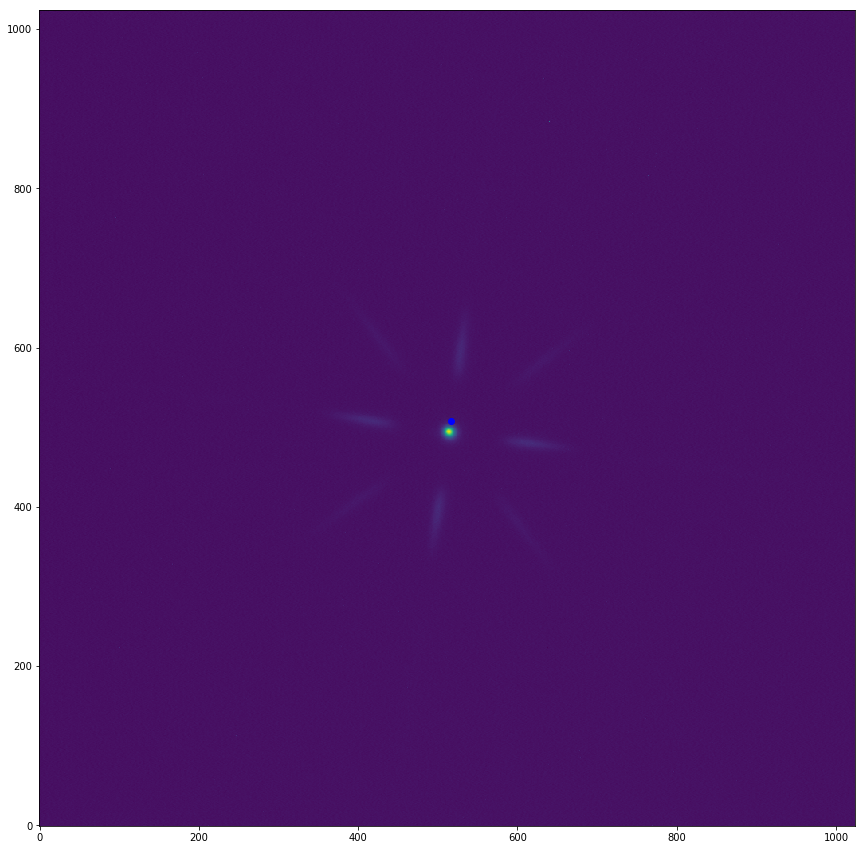

In [4]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(imarray,origin='lower')

ax.plot(int(cy),int(cx), 'bo')

### plot a 120x400 crop of the horizontal wings

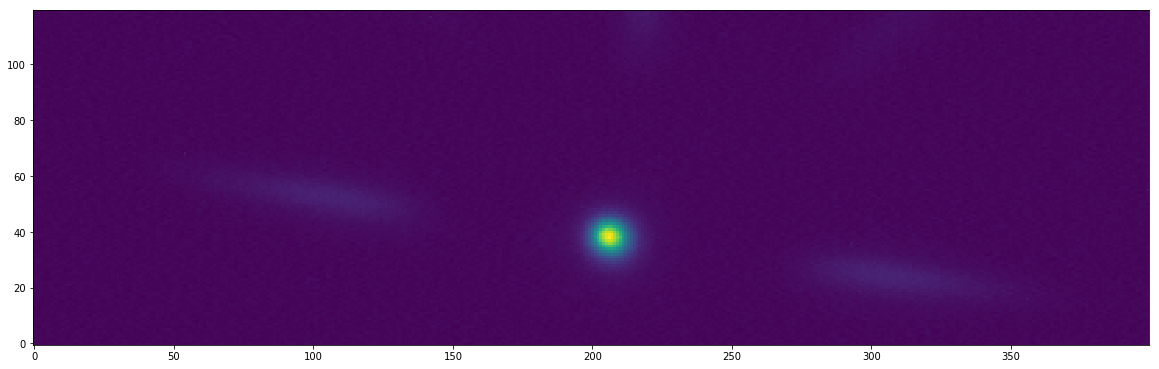

In [6]:
subim=imarray[int(cy)-60:int(cy)+60,int(cx)-200:int(cx)+200]

fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(subim,origin='lower')

#ax.plot(int(cy),int(cx), 'bo')

### populate an array of the max intensity values of each column in the crop

In [7]:
hormax=np.amax(subim,axis=0)

print(hormax)


[ 531  544  550  529  536  547  547  536  546  543  569  538  537  583
  547  571  541  544  550  556  586  536  555  542  536  552  543  542
  542  557  535  531  551  536  555  566  543  558  574  592  546  557
  562  542  548  555  560  578  572  554  594  562  572  596  820  626
  597  618  620  612  628  659  677  667  690  728  716  702  715  686
  720  753  720  792  854  760  807  785  779  817  806  844  861  881
  834  865  915  905  912  934  954  915  976  960  991 1043 1016 1025
  992 1011 1071 1083 1027 1026 1044 1066 1077 1070 1033 1020 1066 1053
 1038 1038 1020 1053 1003  989 1040  970  951  976  938  909  907  877
  893  874  846  823  796  832  775  755  691  685  680  684  641  619
  606  621  829  600  575  565  583  610  594  554  574  575  552  563
  559  571  581  553  583  537  578  564  544  557  558  580  569  577
  549  549  543  566  592  553  562  537  550  583  565  555  555  603
  593  586  589  618  637  618  619  636  650  680  732  737  853 1022
 1230 

### also track the index of those max intensities in another array

In [8]:
horargmax=np.argmax(subim,axis=0)

horargmax=horargmax.astype(float)

print(horargmax)

[ 38.  99.  25.  94.  67.  62.  69.  53.  30.  26.  66.  87.  91.  21.
  58.  55.  70.  44. 105.  29.  78.  90.  73.  73.   6.   4. 105.  17.
  90.  40.   9.  22.  59.  60. 111.  62.  68.  74.  24.  55.  11. 102.
 102.  65.  50.  74.  34.  64.   5.  65.  61.  69.  62.  59.  68.  63.
  60.  60.  62.  61.  58.  58.  60.  60.  61.  58.  58.  60.  60.  59.
  59.  56.  56.  58.  58.  55.  56.  59.  57.  55.  55.  57.  56.  57.
  54.  55.  55.  56.  55.  55.  53.  55.  55.  55.  54.  55.  55.  54.
  52.  53.  53.  53.  54.  54.  53.  53.  52.  52.  51.  51.  53.  52.
  53.  51.  53.  51.  50.  49.  50.  50.  51.  50.  51.  50.  50.  49.
  49.  49.  49.  51.  49.  48.  50.  52.  51.  49.  49.  48.  50.  43.
  47.  43. 117.  50.  48.  41.  47.  52.  52.  13. 113. 115.  65. 101.
  36. 106. 108.  91.  48.  41.  34.  12.  60.  37.  53.  23.  72.  28.
  12.  58.  50.  24.  23.  23.  37.  42.  60.  66.   8.  86.  27.  35.
  35.  37.  38.  43.  41.  66.  37.  34.  39.  35.  35.  42.  41.  39.
  38. 

In [9]:
cols=400
rows=120

In [10]:
X = np.arange(cols)

### Mask out the columns with no diffraction or stellar information, by replacing those values with NaN
criteria for this is pixel count less than 670 for this exposure

In [15]:
hornanargmax=np.copy(horargmax)
for i in X:
    if hormax[int(i)] < 670:
        hornanargmax[int(i)]=np.nan

In [16]:
print(hornanargmax)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  68.  nan
  nan  nan  nan  nan  nan  nan  60.  nan  61.  58.  58.  60.  60.  59.
  59.  56.  56.  58.  58.  55.  56.  59.  57.  55.  55.  57.  56.  57.
  54.  55.  55.  56.  55.  55.  53.  55.  55.  55.  54.  55.  55.  54.
  52.  53.  53.  53.  54.  54.  53.  53.  52.  52.  51.  51.  53.  52.
  53.  51.  53.  51.  50.  49.  50.  50.  51.  50.  51.  50.  50.  49.
  49.  49.  49.  51.  49.  48.  50.  52.  51.  49.  49.  48.  nan  nan
  nan  nan 117.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  35.  35.  42.  41.  39.
  38. 

## Plot the intensity max position of each column
The points in the center is the stellar target. The two groups on either sides are the diffractions of the targets due to the ronchi grating

Text(0.5,0,'Pixel Column')

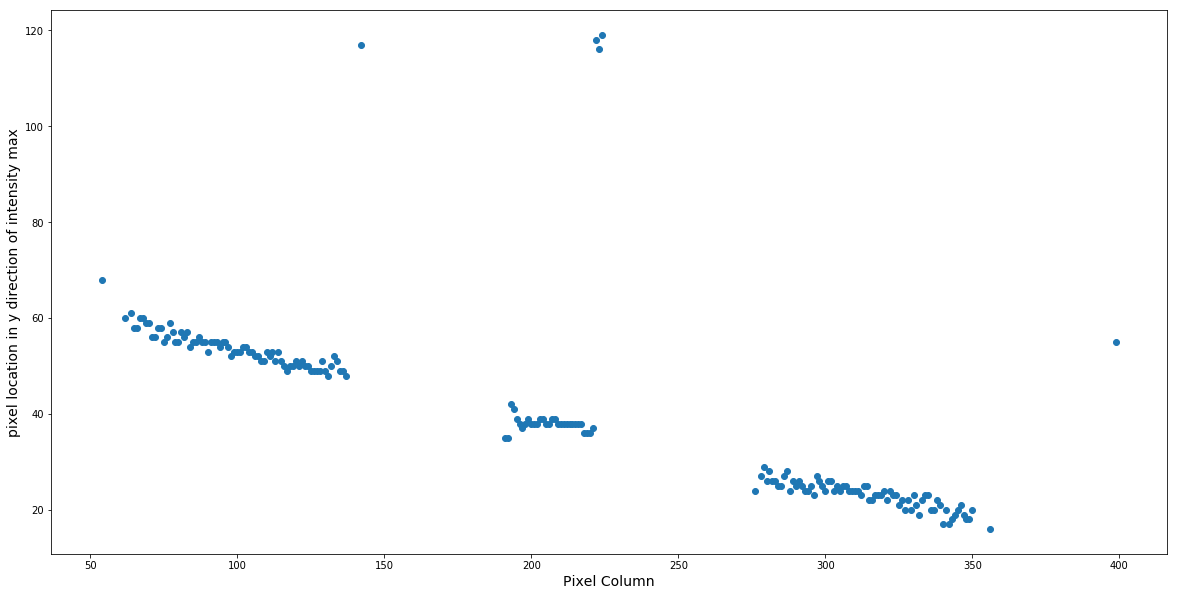

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(X,hornanargmax)
plt.ylabel("pixel location in y direction of intensity max",size=14)
plt.xlabel("Pixel Column",size=14)
#plt.scatter(np.linspace(0,60,60),horargmax[60:120])

### Identify the diffraction regions
left order is at column 80 to 130
right order is at column 275 to 350

In [1226]:
#w1r=(60,140)
w1r=(80,130)

w2r=(275,350)

XX=range(w1r[0],w1r[1],1)
print(XX)

horwing1 = np.polyfit(X[w1r[0]:w1r[1]], horargmax[w1r[0]:w1r[1]], 1)
print(horwing1)

horwing2 = np.polyfit(X[w2r[0]:w2r[1]], horargmax[w2r[0]:w2r[1]], 1)
print(horwing2)

range(80, 130)
[-0.1440096 67.7090036]
[-0.1171835  59.94791844]


In [1227]:
p1 = np.poly1d(horwing1)
p2= np.poly1d(horwing2)